In [90]:
import astropy.io.fits as pf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from astropy import constants as const
from astropy import units as u
#import tycholib_jupyter as tj
import matplotlib.ticker as ticker
import imp
import sys, os, glob
import tycholib_jupyter_finalpaper_v2 as tj
imp.reload(tj)
import math
import json
from astropy.io import ascii
import matplotlib.gridspec as gridspec # For spacing subplots
from astropy.wcs import WCS
from astropy.wcs.utils import skycoord_to_pixel
from astropy.coordinates import SkyCoord
import math
import time
from astropy.visualization import (LogStretch, ImageNormalize, SqrtStretch)
import pandas as pd
from astroquery.splatalogue import Splatalogue as splat
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from astropy.visualization import (LogStretch, ImageNormalize, SqrtStretch, SinhStretch)


from astropy.visualization import (MinMaxInterval, SqrtStretch,
                                   ImageNormalize)

import configparser
import ast

In [91]:
########### plotting setup ####################################################


from matplotlib.colors import LinearSegmentedColormap
def custom_div_cmap(numcolors=11,name='custom_div_cmap',colorarray=['blue','white','red']):
   cmap = LinearSegmentedColormap.from_list(name=name,
                                            colors=colorarray,
                                            N=numcolors)
   return cmap

blueorange = ['#0e4c72','#2e74a0','#3faeba','#88dfe8','#C3EDA5','#fffc63','#cdd313','#ce9300','#c65c00','#7a2c00']
whiteorange = ['#ffffff','#3B5998','#00a0d1','#bbffee','#c3e88d','#f7c56e','#ff7700','#cb1d1d']
blackorange = ['#000000','#3B5998','#00a0d1','#bbffee','#c3e88d','#f7c56e','#ff7700','#cb1d1d']

cmap_whiteorange = custom_div_cmap(256,'custom_div_cmap',whiteorange)
cmap_blackorange = custom_div_cmap(256,'custom_div_cmap',blackorange)
cmap_blueorange = custom_div_cmap(256,'custom_div_cmap',blueorange)


cmap_blueorange.set_under('#0e4c72')
cmap_blueorange.set_bad('#0e4c72')
cmap_blueorange.set_over('#7a2c00')


In [100]:
cfg = configparser.ConfigParser()
cfg.read('Emb8N_cont_product.cfg')

['Emb8N_cont_product.cfg']

In [101]:
FitsDictionary = {}
prefixes = ast.literal_eval(cfg.get('directory','prefixes'))
names  = ast.literal_eval(cfg.get('directory','names'))

In [102]:
plt.rcParams['axes.linewidth'] = 2.0 #set the value globally
plt.rc('axes',edgecolor='black')

with open('database/sources.json', 'r') as f:
    sources_dict = json.load(f)
plt.rc('font', family='sans-serif',size=20)

In [103]:
manual_keys = names
manual_prefixes = prefixes


with open('database/sources.json', 'r') as f:
    sources_dict = json.load(f)
plt.rc('font', family='sans-serif',size=20)

Emb8N /scigarfs/opsw/work/ltychoni/ALMA/Emb8N/
 === Continuum filename ===  /scigarfs/opsw/work/ltychoni/ALMA/Emb8N/member.uid___A001_X1465_X1fd3.Ser-emb_8_N_sci.spw25_27_29_31_33_35_37.continuum_main.I.pbcor.fits
 === Continuum shape ===  (1600, 1600)
vmin,vmax 0.04549018442630768 23.649216
plotidx row col 0 0 0
975.0655477097101 868.4160156022947 142.85714255266328


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Cirlce mean 0.68
Cirlce max 10.20
Continuum max 23.65 mJy/beam
std max 0.11 mJy/beam
SNR 94.37
[0.3243382126092911, 0.6486764252185822, 1.2973528504371643, 9.181862354278564]


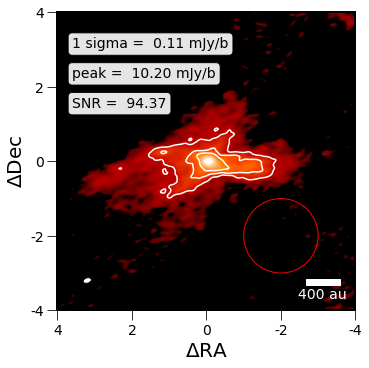

In [105]:
plt.rcParams['axes.linewidth'] = 2 #set the value globally
plt.rc('axes',edgecolor='black')
plt.rc('font', family='sans-serif',size=14)

ncols = 1
nrows = 1
ra_select = 'ra_1'
dec_select = 'dec_1' 



fig1 = plt.figure(constrained_layout=True,figsize=(14,5))
spec1 = gridspec.GridSpec(ncols=ncols,nrows=nrows,figure=fig1,wspace=0.1,hspace=0.1)

plotidx = 0
#for keys in [sources_dict.keys():]
for i in range(len(manual_keys)):
#for i in range(1):

            source = manual_keys[i]
            prefix = manual_prefixes[i]
            
            print(source,prefix)
            
            
            
            if '7m' in prefix:
                zoom_arcsec = 16
            else:
                zoom_arcsec = 4
  
            
            
            
            contname = glob.glob(prefix+'*continuum_main*.fits')[0]
            print (' === Continuum filename === ', contname)

            cont_dataset, cont_header = pf.getdata(contname,header=True)
            cont_dataset = cont_dataset[0,0,:,:]*1e3
                        
            print (' === Continuum shape === ', np.shape(cont_dataset))
            
            

            
            
            w = WCS(contname)
            
            header = cont_header
            
            try:
                bmin = 3600.0 * header['BMIN']
                bmaj = 3600.0 * header['BMAJ']
                bpa = header['BPA']
            except:
                print("beam not defined in the header")
                bmin = 3600.0 * 1e-4
                bmaj = 3600.0 * 1e-4
                bpa = 90

            c = SkyCoord(sources_dict[source][ra_select],sources_dict[source][dec_select], unit='deg')
            xc, yc = skycoord_to_pixel(c, w, origin=0, mode='all')  #
            
            
            c_rms = SkyCoord(sources_dict[source][ra_select]-2/3600.,sources_dict[source][dec_select]-2/3600., unit='deg')
            xc_rms, yc_rms = skycoord_to_pixel(c_rms, w, origin=0, mode='all')  #
            
            vmin = np.nanstd(cont_dataset)/5.0
            vmax = np.nanmax(cont_dataset)
            print ('vmin,vmax',vmin,vmax)
            #rint ('std*0.3,max*0.8',np.nanstd(cont_dataset)*0.3,np.max(zoomed_tab)*0.8)            
            
            array='12m'

            
            print ('plotidx','row','col',plotidx,int(plotidx/4),int(plotidx%4))
            
            f1_ax1 =  fig1.add_subplot(spec1[int(plotidx/4),int(plotidx%4)])
            ax = f1_ax1
            
            pixval_arcsec = np.abs(cont_header['CDELT1']*3600)
            zoom_in_pixels = zoom_arcsec / pixval_arcsec
            
            print (xc,yc,zoom_in_pixels)
            
            zoomed_tab = cont_dataset[int(yc - zoom_in_pixels):int(yc + zoom_in_pixels),
                                      int(xc - zoom_in_pixels):int(xc + zoom_in_pixels)]
            ax.set_ylim(yc - zoom_in_pixels, yc + zoom_in_pixels)
            ax.set_xlim(xc - zoom_in_pixels, xc + zoom_in_pixels)
                            
                
                
            plot_vmin = np.nanstd(cont_dataset)*0.3
            plot_vmax = np.max(zoomed_tab)*0.8
        
            cont_norm = ImageNormalize(cont_dataset, vmin=plot_vmin,
                                           vmax=plot_vmax,
                                           stretch=LogStretch(1000)) 
            
            
            #print (LogStretch(1000))
            
            norm_v2 = ImageNormalize(cont_dataset, interval=MinMaxInterval(),
                      stretch=SinhStretch())
            
            ax.tick_params(which='major',length=8)
            
            
            im =  ax.imshow(cont_dataset[:, :], origin='lower', cmap='gist_heat',norm=cont_norm,
                                                        interpolation=None
                                                       )            
            o = 0
            shift = 0
            ax.set_xticks([xc - zoom_in_pixels + shift, \
                xc - 0.5 * (zoom_in_pixels - shift), \
                xc,
                xc + 0.5 * (zoom_in_pixels - shift), \
                xc + (zoom_in_pixels - shift)])

            ax.set_yticks([yc - zoom_in_pixels + shift, \
                            yc - 0.5 * (zoom_in_pixels - shift), \
                            yc, \
                            yc + 0.5 * (zoom_in_pixels - shift), \
                            yc + zoom_in_pixels - shift])

            #print (xc,yc)

            ticks_x = np.array(ax.get_xticks())
            ticks_y = np.array(ax.get_yticks())

            ax.set_xticklabels([])
            ax.set_yticklabels([])

            xticktab = np.round(ticks_x * pixval_arcsec\
                                        - (xc) * pixval_arcsec, 0).astype(int)
            yticktab = np.round(ticks_y * pixval_arcsec\
                                 - (yc) * pixval_arcsec, 0).astype(int)
            if plotidx == 12 or plotidx == 0:
                                ax.set_xticklabels(np.flip(xticktab))
                                ax.set_yticklabels(yticktab)
                                ax.set_xlabel('$\Delta$RA',fontsize=20)
                                ax.set_ylabel('$\Delta$Dec',fontsize=20)


            
            synth_beam = patches.Ellipse((xc - zoom_in_pixels*4/5, yc - zoom_in_pixels*4/5),
                                width=bmin/pixval_arcsec,
                                height=bmaj/pixval_arcsec, angle=bpa,
                                facecolor='white', edgecolor='black')
            
            ax.add_patch(synth_beam)

            scalebar_size=zoom_arcsec*100
                            #scalebar = AnchoredSizeBar(axarr[plotidx].transData, scalebar_size/(pixval_arcsec*sources_dict[source]['d']),str(int(scalebar_size))+' au',\
                            #              4,pad=0.5, color='white', frameon=False,size_vertical = 1,sep=3)
            scalebar = AnchoredSizeBar(ax.transData,\
                                       scalebar_size/(pixval_arcsec*sources_dict[source]['d'])\
                                                       ,str(int(scalebar_size))+' au',\
                                           4,pad=0.5, color='white', frameon=False,\
                                                       size_vertical=zoom_in_pixels*1/25,sep=3)
            ax.add_artist(scalebar)


            
            #### plot cirlce regions
            
            r_l=1
            circle_mask_source = tj.make_circle(np.shape(cont_dataset)[0], np.shape(cont_dataset)[1], \
                                         xc, yc, r_l, pixval_arcsec)

            circle_mask_rms = tj.make_circle(np.shape(cont_dataset)[0], np.shape(cont_dataset)[1], \
                                         xc_rms, yc_rms, r_l, pixval_arcsec)
            
            #circle1 = plt.Circle((xc,yc),r_l/pixval_arcsec,color='r',fill=False)
            #ax.add_patch(circle1)
            
            circle2 = plt.Circle((xc_rms,yc_rms),r_l/pixval_arcsec,color='r',fill=False)
            ax.add_patch(circle2)
            
            #axtop = inset_axes(ax,width='100%',height='10%',bbox_to_anchor=(0.03,0.82,1,0.30),\
            #                              bbox_transform=ax.transAxes)
            #axtop.tick_params(which='major',length=5)
            #if array == '7m':                            
            #        cbar = fig1.colorbar(im,shrink=1.0,\
            #                ticks=[np.round(np.arange(vmin*1.01,vmax*0.99,step=vmax*0.2),1)],\
            #                            orientation='horizontal',cax=axtop, ticklocation='top'\
             #                            )
            #elif array == '12m':
            #        cbar = fig1.colorbar(im,shrink=1.0,\
            #                ticks=[np.arange(1e3*vmin*1.01,1e3*vmax*0.99,step=1e3*vmax*0.1)],\
            #                            orientation='horizontal',cax=axtop, ticklocation='top',\
        #                             spacing='uniform')
        
            

            cbar = fig1.colorbar(im,shrink=1.0,spacing='uniform',\
                                 ticks=[np.round([0.01*plot_vmax,0.1*plot_vmax,plot_vmax*0.8],1)],\
                                        orientation='horizontal',cax=axtop, ticklocation='top')

            if (int(plotidx/ncols)) == 0:
                            if array == '7m':
                                cbar.set_label('Jy beam$^{-1}$',fontsize=12)
                            if array == '12m':
                                cbar.set_label('mJy beam$^{-1}$',fontsize=12)
            

            props = dict(boxstyle='round', facecolor='white', alpha=0.9)


            ax.tick_params(which='major',length=10)

            #im =  ax.contourf(cont_dataset, origin='lower',vmin=vmin,
            #                                      vmax=vmax,extend='both',
            #                                      levels=np.arange(vmin,vmax,(vmax-vmin)/15),
            #                                      cmap='gist_heat'
            #                                    )


            
            
            
            meantab_circle = np.nanmean(cont_dataset[circle_mask])
            max_circle = np.nanmax(cont_dataset[circle_mask])

            std_circle = np.nanmax(cont_dataset[circle_mask_rms])

            print ('Cirlce mean %.2f'%(meantab_circle))
            print ('Cirlce max %.2f'%(max_circle))
            print ('Continuum max %.2f mJy/beam'%(vmax))

            print ('std max %.2f mJy/beam'%(std_circle))
            levels=[std_circle*3,std_circle*6,std_circle*12,max_circle*0.9]
            
            print ('SNR %.2f'%(max_circle/std_circle))

            
            ax.contour(cont_dataset,origin='lower',colors='white',
                                                  levels=levels,
                                                )
            ax.text(0.05,0.88,'1 sigma =  %.2f mJy/b'%(std_circle),\
                                                transform=ax.transAxes,color='black',bbox=props)

            ax.text(0.05,0.78,'peak =  %.2f mJy/b'%(max_circle),\
                                                transform=ax.transAxes,color='black',bbox=props)
            
            ax.text(0.05,0.68,'SNR =  %.2f'%(max_circle/std_circle),\
                                                transform=ax.transAxes,color='black',bbox=props)

            print (levels)
            plotidx += 1
        
            
plt.savefig('plots/cont_'+str(plotidx)+'_product.png',dpi=300)
            

plt.show()
plt.close()
